In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_AE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2,7,8,2,9,11,7.0,7,1.0,8.0,5.0,6,NaN
1,4.0,7.0,5.0,5.0,5,5,9,6,4,8,7.0,9,2.0,9.0,7.0,10,NaN
2,NaN,NaN,NaN,NaN,4,8,8,5,10,11,NaN,8,NaN,NaN,NaN,10,NaN
3,NaN,NaN,NaN,NaN,4,7,7,13,1,7,NaN,8,NaN,NaN,NaN,8,NaN
4,6.0,7.0,8.0,5.0,4,7,6,3,7,10,7.0,9,3.0,8.0,3.0,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,NaN,NaN,NaN,3,4,10,7,8,12,NaN,9,NaN,NaN,NaN,6,NaN
19996,NaN,NaN,NaN,NaN,3,7,8,2,10,12,NaN,8,NaN,NaN,NaN,8,NaN
19997,4.0,8.0,4.0,6.0,4,7,8,7,4,10,7.0,6,3.0,9.0,3.0,7,NaN
19998,NaN,NaN,NaN,NaN,3,0,2,4,6,1,NaN,7,NaN,NaN,NaN,8,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	8000
float64		column 2	8000
float64		column 3	8000
float64		column 4	8000
int64		column 5	0
int64		column 6	0
int64		column 7	0
int64		column 8	0
int64		column 9	0
int64		column 10	0
float64		column 11	8000
int64		column 12	0
float64		column 13	8000
float64		column 14	8000
float64		column 15	8000
int64		column 16	0
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,12000.000000,12000.000000,12000.000000,12000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,12000.000000,20000.000000,12000.000000,12000.000000,12000.00000,20000.00000,0.0
mean,4.017083,7.000083,5.135000,5.332750,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.557167,7.929000,3.115167,8.363833,3.72475,7.80120,NaN
std,1.879163,3.244168,1.961699,2.222035,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.513714,2.080619,2.337632,1.522493,2.54523,1.61747,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.00000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.00000,7.00000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.00000,8.00000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.00000,9.00000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,15.00000,15.00000,NaN


<AxesSubplot:>

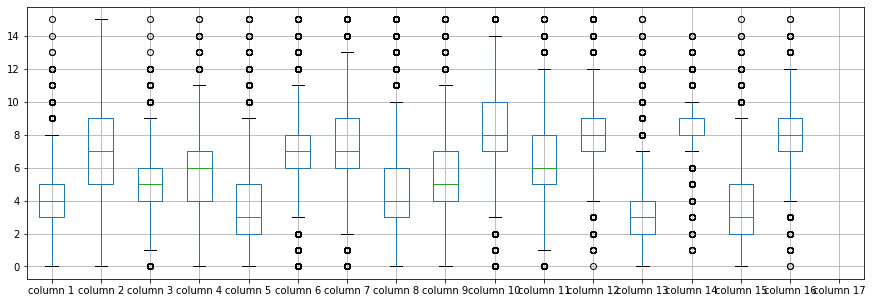

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.017083
column 2     7.000083
column 3     5.135000
column 4     5.332750
column 5     3.505850
column 6     6.897600
column 7     7.500450
column 8     4.628600
column 9     5.178650
column 10    8.282050
column 11    6.557167
column 12    7.929000
column 13    3.115167
column 14    8.363833
column 15    3.724750
column 16    7.801200
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.756776,0.847890,0.668923,0.607601,-0.075810,0.045851,0.010863,0.016674,0.118776,0.027978,-0.070465,0.487855,0.107937,0.237819,-0.164940,NaN
column 2,0.756776,1.000000,0.670405,0.823253,0.552079,0.005024,-0.028430,-0.042558,0.061223,0.135899,-0.052657,-0.045955,0.276328,0.021305,0.201057,-0.095190,NaN
column 3,0.847890,0.670405,1.000000,0.653477,0.758300,0.018842,0.018443,-0.113241,0.033395,0.083767,0.006006,-0.066319,0.555727,0.046560,0.219358,-0.181796,NaN
column 4,0.668923,0.823253,0.653477,1.000000,0.644362,0.003480,-0.010478,0.060484,0.009021,-0.011610,-0.009262,-0.017184,0.267995,0.040653,0.271805,-0.079860,NaN
column 5,0.607601,0.552079,0.758300,0.644362,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.097517,-0.038858,0.627228,0.002544,0.465970,-0.062969,NaN
column 6,-0.075810,0.005024,0.018842,0.003480,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.402585,-0.032115,0.120253,-0.263128,0.124542,0.248816,NaN
column 7,0.045851,-0.028430,0.018443,-0.010478,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.583623,-0.271649,-0.095617,0.549283,-0.137383,-0.207900,NaN
column 8,0.010863,-0.042558,-0.113241,0.060484,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.023540,0.082020,0.163373,-0.087142,0.009692,0.182902,NaN
column 9,0.016674,0.061223,0.033395,0.009021,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.052628,0.119048,-0.392444,-0.052836,0.241408,-0.061335,NaN
column 10,0.118776,0.135899,0.083767,-0.011610,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.014380,-0.106759,-0.224106,0.033033,-0.140336,-0.114223,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [ ]:
imputer = md.Midas(layer_structure = [17,17+35,17+35+35,17+35+35+35,17+35+35,17+35,17], vae_layer = False, seed = 350)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised



In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.103856
column 2     5.492421
column 3     4.018366
column 4     4.444174
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    5.135850
column 12    6.000000
column 13    2.458753
column 14    6.483067
column 15    2.944847
column 16    8.000000
column 17    1.721527
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
1,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
2,-4.347795,-5.384458,-4.437349,-3.177669,0,0,0,0,0,0,2.557976,0,0.143016,0.822517,-2.532617,0,NaN
3,-0.877774,-3.986055,-1.065124,-2.933626,0,0,0,0,0,0,-1.086796,0,-0.539953,-1.666203,2.953413,0,NaN
4,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-2.583878,-5.902281,-1.962251,-4.687709,0,0,0,0,0,0,-6.347889,0,-0.246933,-4.100346,0.315943,0,NaN
19996,-1.239933,-2.371435,-2.489721,-1.497919,0,0,0,0,0,0,-1.694360,0,1.039451,-3.402933,-3.397630,0,NaN
19997,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
19998,-0.300412,-4.736928,0.654365,-3.135102,0,0,0,0,0,0,5.969172,0,2.910429,-0.327051,3.437920,0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

698.3612883190868

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.1870368575266823

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17     1.245728
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.000000,4.000000,4.000000,3.000000,2,7,8,2,9,11,7.000000,7,1.000000,8.000000,5.000000,6,0.934346
1,4.000000,7.000000,5.000000,5.000000,5,5,9,6,4,8,7.000000,9,2.000000,9.000000,7.000000,10,1.427271
2,2.652205,4.615542,3.562651,3.822331,4,8,8,5,10,11,4.557976,8,2.143016,5.822517,2.467383,10,0.313425
3,3.122226,5.013945,3.934876,4.066374,4,7,7,13,1,7,4.913204,8,2.460047,6.333797,2.953413,8,1.679154
4,6.000000,7.000000,8.000000,5.000000,4,7,6,3,7,10,7.000000,9,3.000000,8.000000,3.000000,7,0.450925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2.416122,4.097719,3.037749,3.312291,3,4,10,7,8,12,3.652111,9,1.753067,4.899654,2.315943,6,1.185394
19996,2.760067,4.628565,3.510279,3.502081,3,7,8,2,10,12,4.305640,8,2.039451,5.597067,2.602370,8,0.677430
19997,4.000000,8.000000,4.000000,6.000000,4,7,8,7,4,10,7.000000,6,3.000000,9.000000,3.000000,7,1.709486
19998,3.699588,6.263072,4.654365,4.864898,3,0,2,4,6,1,5.969172,7,2.910429,7.672949,3.437920,8,-0.078351


In [21]:
imputations[-1].to_excel("Letter_AE_10(imp).xlsx", index=False, header=False)